In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

Step 1: Load all image paths

In [2]:
import glob

image_paths = glob.glob("/kaggle/input/cat-and-dog/**/*.jpg", recursive=True)
len(image_paths)


10028

In [11]:
type(image_paths)

list

# Looking Random Image

Random image path: /kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2183.jpg


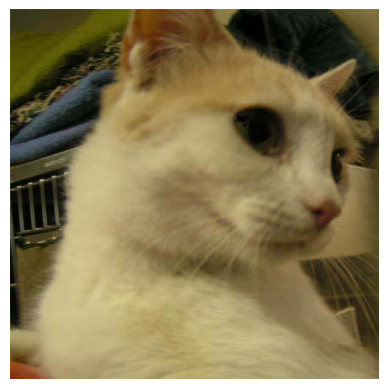

In [78]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# pick a random image path
random_image = random.choice(image_paths)
print("Random image path:", random_image)

# load image
img = tf.io.read_file(random_image)
img = tf.image.decode_jpeg(img, channels=3)

# show image
plt.imshow(img)
plt.axis('off')
plt.show()


# Step 2: Create labels from folder structure

In [5]:
cats = [p for p in image_paths if "/cats/" in p.lower()]
dogs = [p for p in image_paths if "/dogs/" in p.lower()]

print("Cats:", len(cats))
print("Dogs:", len(dogs))


Cats: 5011
Dogs: 5017


# Step 3: Build feature list + label list

In [6]:
paths = cats + dogs

labels = [0] * len(cats) + [1] * len(dogs)   # 0 = cat, 1 = dog


# Step 4: Train/Test Split (just like ML!)

In [7]:

from sklearn.model_selection import train_test_split

train_paths, test_paths, train_labels, test_labels = train_test_split(
    paths, labels, test_size=0.2, random_state=42, shuffle=True
)


# Step 5: Create a TensorFlow dataset loader (BEST way)

In [8]:
import tensorflow as tf

def load_image(path, label):
    img = tf.io.read_file(path)                    # read file
    
    img = tf.image.decode_jpeg(img, channels=3)    # decode
    
    img = tf.image.resize(img, (150, 150)) # resize

    
    img = img / 255.0                              # normalize
    return img, label


# Create DataSets:

In [51]:
# Take only first 500 for training
train_ds = tf.data.Dataset.from_tensor_slices((train_paths[:500], train_labels[:500]))
# train_ds = image url , label


train_ds = train_ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
# updated image (rgb form) with label

train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)

# Take only first 200 for testing
test_ds = tf.data.Dataset.from_tensor_slices((test_paths[:200], test_labels[:200]))
test_ds = test_ds.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)



# Step 6: Train CNN

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D , Conv2D , Flatten , Dense

In [69]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_ds, validation_data=test_ds, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 795ms/step - accuracy: 0.4754 - loss: 1.5721 - val_accuracy: 0.4550 - val_loss: 0.6926
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.5266 - loss: 0.6924 - val_accuracy: 0.4550 - val_loss: 0.6929
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 862ms/step - accuracy: 0.5333 - loss: 0.6790 - val_accuracy: 0.5100 - val_loss: 0.6863
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 783ms/step - accuracy: 0.6214 - loss: 0.6480 - val_accuracy: 0.6200 - val_loss: 0.6485
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 810ms/step - accuracy: 0.7329 - loss: 0.5491 - val_accuracy: 0.4650 - val_loss: 0.9551


#  Evaluate the model on the test set

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


#  Get predictions for the confusion matrix

In [71]:
import numpy as np

y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)   # convert probabilities → binary class

    y_true.extend(labels.numpy())
    y_pred.extend(preds.reshape(-1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


# 3. Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[  5 104]
 [  3  88]]


# 4. Plot Confusion Matrix

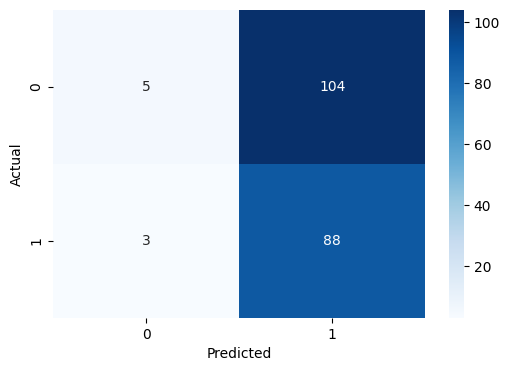

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 5. Predict a single image

In [81]:
import random
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = random.choice(image_paths)
print("Selected:", img_path)

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print("Prediction:", "Dog" if prediction[0][0] > 0.5 else "Cat")


Selected: /kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4918.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction: Dog
